### Importations des modules nécessaires
1. __Numpy__ : Package fondamental pour le calcul scientifique en Python.
2. __os__ : Bibliothèque intégrée de Python qui fournit des fonctionnalités pour interagir avec le système d'exploitation
3. __cv2__ : Fait référence à __OpenCV__, une bibliothèque open-source populaire pour le traitement d'images et de vidéos en temps réel.  
             __OpenCV__ (Open Source Computer Vision Library)
5. __pickle__ : Module de la bibliothèque standard de Python qui permet de sérialiser et désérialiser des objets Python.
6. __MTCNN__ : Modèle utilisé pour la détection de visages et d'autres caractéristiques faciales.
7. __FaceNet__ : Modèle de réseau de neurones profonds utilisé pour l'extraction de caractéristiques et la reconnaissance faciale.
8. __LabelEncoder__ : Classe du module "__sklearn.preprocessing__" de "__scikit-learn__" utilisée pour encoder les étiquettes de classes en nombres entiers.
9. __train_test_split__ : Permet de diviser un ensemble de données en ensembles d'entraînement et de test.
10. __SVC__ : Classe du module "__sklearn.svm__" de "__scikit-learn__" utilisée pour entraîner des __SVM__ pour la classification binaire et multiclasse.  
             __SVM__ (machines à vecteurs de support)
11. __sklearn.metrics__ : pour évaluer les performances des modèles d'apprentissage automatique.  
    __accuracy_score__ : utilisée pour calculer le taux de classification correcte d'un modèle de classification.
12. __matplotlib.pyplot__ : Module de la bibliothèque Matplotlib, qui est largement utilisée pour la visualisation de données en Python.

In [1]:
import numpy as np
import os
import cv2
import pickle 
from mtcnn.mtcnn import MTCNN # (Multi-Task Cascaded Convolutional Neural Network)
from keras_facenet import FaceNet 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt 

#### Initialisation

In [2]:
target_size = (160,160) # la taille des images d’entrée attendues par le modèle FaceNet

X, Y = [], [] # listes qui contiendra les visages extraire (X) et les noms de chaque visage (Y)

detection = MTCNN() # notre model de detection faciale

embedder = FaceNet() # notre model d'embeddings

encoder = LabelEncoder() # pour encoder les étiquettes de classes en nombres entiers.

#### Fonction pour extraire le visage

In [3]:
def Extraire_Visage(image_path): 
    image_path = image_path # Chemin de l'image
    
    image = cv2.imread(image_path) # Lire l'image (BGR):(blue, green, red) 
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convertir l'image BGR en RGB:(red, green, blue) 
    
    x, y, w, h = detection.detect_faces(image)[0]['box'] # positionnement de visage (on suppose que l'imgae contient un seul visage) 
    # (x,y): coordonnée du coin supérieur gauche du cadre de délimitation
    # w, h : largeur et hauteur du cadre de délimitation
    
    face = image[int(y):int(y+h), int(x):int(x+w)] # extraire le visage
    
    face = cv2.resize(face, target_size) # 160x160 : FaceNet
    return face

#### Fonction pour mettre les visages extraire dans une liste

In [4]:
def Chargement_Visage(dossierNom_path): # dossierNom_path: chemin des dossiers qui contient les images
    
    faces = [] # liste des visages
    
    for image_nom in os.listdir(dossierNom_path): # Itérer à travers les images du dossier  
        try:
            path = os.path.join(dossierNom_path, image_nom) # chemin complet

            # Extraire le visage et l'ajouter dans la liste (faces) 
            face = Extraire_Visage(path) 
            faces.append(face) 
            
        except Exception as e: # juste pour eviter une erreur s'il trouve que le dossier est vide 
            pass 
    return faces 

#### Fonction pour charger les caracteristiques et les etiquettes 

In [5]:
def Chargement_classes(dataset_path): #dataset_path = "datasets/"
    
    for dossier in os.listdir(dataset_path): 
        
        path = os.path.join(dataset_path, dossier) # chemin
        
        faces = Chargement_Visage(path) # Les visages
        
        labels = [dossier for _ in range(len(faces))] # 'dossier' contient le nom que je souhaite attribuer à chaque visage. 
        
        print(f"Loaded successfully: {len(labels)}")
        
        X.extend(faces) # Les visages
        
        Y.extend(labels) # Noms de chaque visage
        
    return np.asarray(X), np.asarray(Y) # convertira X et Y en tableau NumPy

#### Fonction pour afficher les visages

In [6]:
def plot_images():
    plt.figure(figsize=(10,8)) # taille des figures
    for num, image in enumerate(X):
        ncols = 4
        nrows = len(Y)//ncols
        plt.subplot(nrows, ncols, num+1)
        plt.imshow(image) 
        plt.axis("off") 

In [7]:
dataset_path = "datasets/" # chemin

X, Y = Chargement_classes(dataset_path) # on recupere notres tableaux des caracteristiques et des etiquettes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━

In [8]:
len(Y), len(X) 

(40, 40)

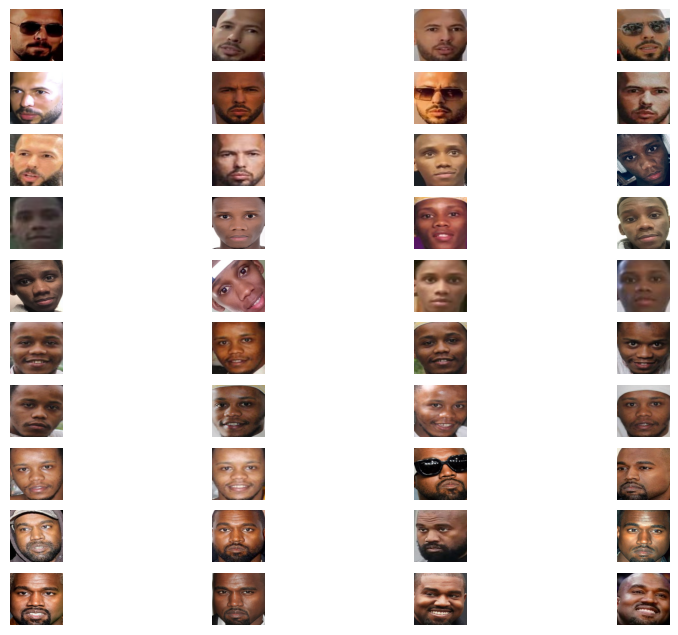

In [9]:
plot_images() # on affiche les visages extraire 

#### Fonction Embeddings

In [10]:
def Embedding(face_img):
    # prétraiter l'image
    face_img = face_img.astype("float32") # 3D (160x160x3)
    face_img = np.expand_dims(face_img, axis=0)

    # Embeddings
    face_embedding = embedder.embeddings(face_img)
    return face_embedding[0]  

In [11]:
EMBEDDED_X = [] # liste des visages embeddings
for img in X:
    EMBEDDED_X.append(Embedding(img)) # on ajoute chaque visage embiddings dans la liste

EMBEDDED_X = np.asarray(EMBEDDED_X) # convertira "EMBEDDED_X" en tableau Numpy

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━

In [12]:
# Sauvegarder 'EMBEDDED_X' et 'Y'  dans un fichier comprimé .npz.
np.savez_compressed("faces_embeddings_4classes.npz", EMBEDDED_X, Y) 

#### SVM Model

In [13]:
# Encoder les Étiquettes 'Y' en valeurs numériques
encoder.fit(Y)
Y = encoder.transform(Y) 

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=10) 

model = SVC(kernel='linear', probability=True, random_state=10) # cree notre model SVC 

model.fit(X_train, Y_train) # entraîner notre modèle sur les données d'entraînement 

SVC(kernel='linear', probability=True, random_state=10)

#### évaluer les performances de notre model.

In [14]:
Ypredict_test = model.predict(X_test) 

accuracy_score(Y_test, Ypredict_test) 

1.0

#### Test

In [15]:
def test(image_path):
    image_path = image_path
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x, y, w, h = detection.detect_faces(image)[0]['box']
    face = Extraire_Visage(image_path)
    face_embedding = Embedding(face) 
    face_embedding = [face_embedding]
    pred = model.predict(face_embedding)
    prob = model.predict_proba(face_embedding)
    
    if round(prob.max(),2) < 0.50:
        nom = "Inconnu"
    else:
        nom = encoder.inverse_transform(pred)[0]

    pos = (x, y-10) # position du text
    # Obtenir les coordonnées et la taille du texte
    text_size, _ = cv2.getTextSize(nom, cv2.FONT_HERSHEY_TRIPLEX, 1, 1)
    text_width, text_height = text_size
    # Calculer les coordonnées du rectangle pour encadrer le texte
    rectangle_left_top = pos[0], pos[1] - text_height
    rectangle_right_bottom = pos[0] + text_width, pos[1]

    img = cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,255), 2)
    img = cv2.rectangle(image, rectangle_left_top, rectangle_right_bottom, (0,0,0), -1)
    cv2.putText(image, nom, (x, y - 10), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 255, 255), 0)
    plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

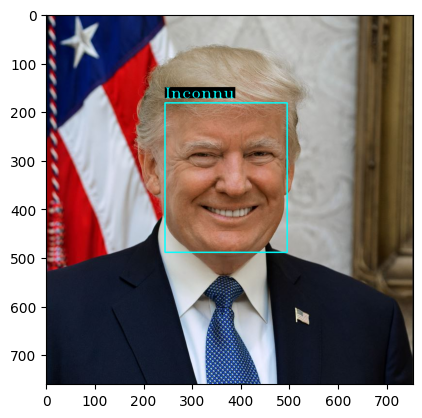

In [16]:
image_path = "image_test/trump.jpg" 
test(image_path) 

In [17]:
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f) 